# **Segmentation**



## 1. Les algorithmes de bruitage







In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#--- Bibliothèques ---
import skimage.io as io
import numpy as np
import math as math
import matplotlib.pyplot as plt
import random as rdm
from copy import deepcopy


In [ ]:
#--- Importation de l'image ---
image = io.imread("/content/drive/MyDrive/Colab Notebooks/CHIEN.jpg")
matrice_image = 1.0*np.array(image)




> ### **1. Appliquer un filtre**



In [16]:
#--- Bruitage Poivre et Sel ---
def Bruitage_PoivreSel(image,bruitage):                  
    #Copie de la matrice originale
    bruitage = 100-bruitage
    image_bruitee = np.copy(image)                   	
    
    #Parcourt de la matrice
    for i in range(image_bruitee.shape[0]):
        for j in range(image_bruitee.shape[1]):     
            #On génère un nombre aléatoire entre 0 et 10 pour sélectionner le pixel à bruiter
            taux_bruitage = rdm.randint(0, bruitage)
            #Si le nombre aléatoire = 10
            if taux_bruitage == bruitage:
                #On génère un nombre aléatoire entre 0 et 1 pour la sélection de la couleur
                couleur_pixel = rdm.randint(0, 1)
                #Si le nombre aléatoire = 0
                if couleur_pixel == 0:
                    #On change le pixel en noir
                    image_bruitee[i,j] = 0
                else:
                    #On change le pixel en blanc
                    image_bruitee[i,j] = 255
    
    #On retourne la matrice modifiée
    return image_bruitee

In [12]:
from copy import deepcopy
from numpy import *

"""
Bruitage Additif
    <image> l'image à bruiter
    <sigma> le sigma du bruitage
    retourne l'image bruitée
"""


def Bruitage_Additif(image, sigma):
    noisedimg = deepcopy(image)

    # Image bruitee = image de base + sigma (matrice aleatoire)
    matriceRdm = sigma * random.randn(noisedimg.shape[0], noisedimg.shape[1])

    # Parcours des lignes de pixels
    for x in range(noisedimg.shape[0]):
        # Parcours des lignes de pixels
        for y in range(noisedimg.shape[1]):
            if noisedimg[x][y] + matriceRdm[x][y] <= 0.0:
                noisedimg[x][y] = 0.0
            else:
                noisedimg[x][y] = noisedimg[x][y] + matriceRdm[x][y]

    return noisedimg


In [13]:
#--- Bruitage Multiplicatif ---
from copy import deepcopy
from numpy import *

"""
Bruitage Multiplicatif
    <image> l'image à bruiter
    <sigma> le sigma du bruitage
    retourne l'image bruitée
"""


def Bruitage_Multiplicatif(image, sigma):
    noisedimg = deepcopy(image)

    r = random.randn(image.shape[0], image.shape[1])
    r = 1.0 + sigma * r

    # Parcours des lignes de pixels
    for x in range(noisedimg.shape[0]):
        # Parcours des colones de pixels
        for y in range(noisedimg.shape[1]):
            # Remise à la valeur maximale des pixels dépassés
            if noisedimg[x][y] * r[x][y] <= 0.0:
                noisedimg[x][y] = 0.0
            else:
                noisedimg[x][y] = noisedimg[x][y] * r[x][y]

    return noisedimg

In [14]:
#--- Calcul du SNR ---
def SNR(image, image_bruitee):
    puissanceBrui = 0
    puissanceSign = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            puissanceSign = puissanceSign + (image[i,j])**2
    for i in range(image_bruitee.shape[0]):
        for j in range(image_bruitee.shape[1]):
           puissanceBrui = puissanceBrui + (image_bruitee[i,j] - image[i,j])**2     #Puissance du bruit = image bruité - image de base
    print("Bruit : "+str(puissanceBrui))
    print("Signal : "+str(puissanceSign))
    return "SNR : "+str(10*np.log(puissanceSign/puissanceBrui))


--- Image d'origine ---


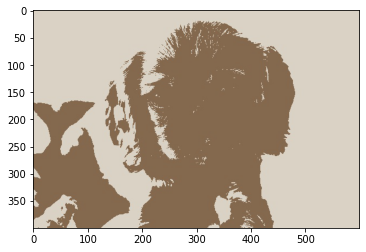


--- Bruitage Poivre et Sel ---
Bruit : [114  62 210]
Signal : [191 183 208]
SNR : [ 5.1607498  10.82351768 -0.09569451]


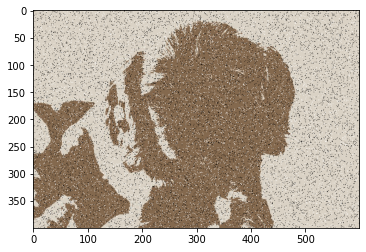

In [17]:
#--- Importation de l'image ---
image = io.imread("/content/drive/MyDrive/Colab Notebooks/CHIEN.jpg")
matrice_image = 1.0*np.array(image)



#--- Affichage de l'image ---
print("\n--- Image d'origine ---")
plt.figure(1)
plt.imshow(image, cmap='gray')
plt.show()

print("\n--- Bruitage Poivre et Sel ---")
Bruitage_PV = Bruitage_PoivreSel(image, 90)
print(SNR(image, Bruitage_PV))
plt.figure(2)
plt.imshow(Bruitage_PV, cmap='gray')
plt.show()


In [18]:
print("\n--- Bruitage Multiplicatif ---")
Bruitage_M = Bruitage_Multiplicatif(matrice_image, 25)
print(SNR(matrice_image, Bruitage_M))
plt.figure(4)
plt.imshow(Bruitage_M, cmap='gray')
plt.show()


--- Bruitage Multiplicatif ---


ValueError: ignored




> ###  **2. Appliquer la méthode de Cluserting**






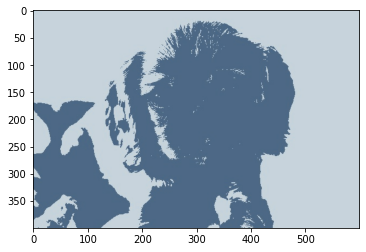

In [9]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io


image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CHIEN.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/CHIEN.jpg', quant)
plt.imshow(image)

cv2.imread('/content/drive/MyDrive/Colab Notebooks/CHIEN.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()






> ###  **3. Comparer les résultats**



